<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center>**Bachelor of Ecole Polytechnique**</center>
<center>Computational Mathematics, year 2, semester 1</center>
<center>Lecturer: Lucas Gerin <a href="mailto:lucas.gerin@polytechnique.edu">(send mail)</a></center>

# Graphs and Matrices 1: Adjacency Matrices


## Table of contents

- [Adjacency Matrices](#Paths)
- [Enumeration of words](#words)
- [Transition Matrices and Absorption probabilities](#Escape)
- [Bonus: The target](#Target)


In [1]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()


In [2]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)
import sympy as sympy             # package for symbolic computation
from sympy import *


<!--<div markdown=1 class="Rmk"> Here is the Latex code of a matrix that you can copy/paste throughout the notebook:
$$
M=
\begin{matrix}
v_1 \\ v_2 \\ v_3 
\end{matrix}
\begin{pmatrix}
1 & 1 & 0\\
0 & 0 & 1\\
0 & 1 & 0\\
\end{pmatrix}.
$$-->


<a id="Paths"></a>
# Adjacency Matrices

### Exercise 1. Warm-up
Let $G$ be the following graph:
<img src="figures/GrapheBasique.jpg" style="width: 200px;"/>


<div markdown=1 class="DoIt"> Use the adjacency matrix of $G$ to compute the number of paths of length $20$ from $d$ to $c$ in $G$.

In [3]:
AdjacencyMatrix=np.matrix([[0,1,0,0],[1,0,1,1],[1,0,0,0],[1,0,0,0]])
n=20
B=AdjacencyMatrix**n
print(str(B[3,3])+' paths of length '+str(n))

#print(B)

488 paths of length 20


<div markdown=1 class="Answers"> 
The number of paths is given by the coefficient corresponding to $(d,c)$ (<i>i.e.</i> coeff.$(4,3)$) in $A^{20}$, where $A$ is given by
$$
A=
\begin{matrix}
a \\ b \\ c\\ d
\end{matrix}
\begin{pmatrix}
0 & 1 & 0 & 0\\
1 & 0 & 1 & 1\\
1 & 0 & 0 & 0\\
1 & 0 & 0 & 0
\end{pmatrix}.
$$

<a id="words"></a>
##  Enumeration of words

### Exercise 2. $b$ never followed by $c$

<div markdown=1 class="DoIt"> We consider words with letters $a,b,c$. Let $M_n$ be the number of words of length $n$ (the length of a word is the number of letters) such that a $b$ is never immediately followed by a  $c$.

For example $M_2=8$:
$$
aa,\ ab,\ ac,\ ba,\ bb,\ ca,\ cb,\ cc.
$$

**Question 1.** Write a script which computes $M_1,M_2,\dots,M_{20}$ using a graph and its adjacency matrix. You can consider the following graph:
<br><br>
<center>
<img src="figures/Graphe_abc.jpg" style="width: 200px;"/></center>
<br>


<div markdown=1 class="Answers"> 

**Question 1.** The number $S_n$ corresponds to the number of paths of length $n-1$ in the above graph ($n-1$ edges correspond to $n$ letters.)

For exemple, the word $abbbac$ (length $6$) corresponds to $a\to b\to b\to b\to a\to c$ (path of length $5$). 

Therefore $M_n$ is the sum of all coefficients in the matrix $A^{n-1}$, where
$$
A=
\begin{matrix}
a \\ b \\ c 
\end{matrix}
\begin{pmatrix}
1 & 1 & 1 \\
1 & 1 & 0 \\
1 & 1 & 1 \\
\end{pmatrix}.
$$


In [4]:
# Matrices of b-short words
Adjacency_abc=np.matrix([[1,1,1],[1,1,0],[1,1,1]])
#print('Adjacency matrix : ')
#print(Adjacency_abc)
List = []
for n in range(1,21):
    Mat=Adjacency_abc**(n-1)
    List.append(np.sum(Mat))
    print('Number of words of size n=',n,': ',np.sum(Mat))


Number of words of size n= 1 :  3
Number of words of size n= 2 :  8
Number of words of size n= 3 :  21
Number of words of size n= 4 :  55
Number of words of size n= 5 :  144
Number of words of size n= 6 :  377
Number of words of size n= 7 :  987
Number of words of size n= 8 :  2584
Number of words of size n= 9 :  6765
Number of words of size n= 10 :  17711
Number of words of size n= 11 :  46368
Number of words of size n= 12 :  121393
Number of words of size n= 13 :  317811
Number of words of size n= 14 :  832040
Number of words of size n= 15 :  2178309
Number of words of size n= 16 :  5702887
Number of words of size n= 17 :  14930352
Number of words of size n= 18 :  39088169
Number of words of size n= 19 :  102334155
Number of words of size n= 20 :  267914296


### Exercise 3.  $b$-short words
<div markdown=1 class="DoIt"> We say that a word $w$ with letters $a,b$ is $b$-<i>short</i> if there are never $4$ consecutive $b$'s in $w$. For instance,
$$
w_1=aa\color{green}{b}aaaaaa\color{green}{bbb}aaa\color{green}{b}aa
$$
is $b$-short while
$$
w_2=aa\color{green}{b}aa\color{green}{bb}a\color{red}{bbbbbb}aa\color{green}{bb}a
$$
is not. Let $S_n$ be the number of $b$-short words of length $n$.

Write a script which computes $S_1,S_2,\dots,S_{20}$ using a graph and its adjacency matrix.


<div markdown=1 class="Answers"> 

**Question 1.** The number $S_n$ corresponds to the number of paths starting from $a$ or $b$ and of length $n-1$ in the graph whose adjacency matrix is
$$
A=
\begin{matrix}
a \\ b \\ b' \\ b''
\end{matrix}
\begin{pmatrix}
1 & 1 & 0 & 0\\
1 & 0 & 1 & 0\\
1 & 0 & 0 & 1\\
1 & 0 & 0 & 0
\end{pmatrix}.
$$

For exemple, the word $abbbaa$ (length $6$) corresponds to $a\to b\to b'\to b''\to a\to a$ (path of length $5$). <br><i>(The vertices $b,b',b''$ ensure that there are never $4$ consecutive $b$'s.)</i>

Therefore $S_n$ is the sum of all coefficients in the two first lines of matrix $A^{n-1}$.


In [5]:
# Matrices of b-short words
Adjacency_bShort=np.matrix([[1,1,0,0],[1,0,1,0],[1,0,0,1],[1,0,0,0]])
print('Adjacency matrix : ')
print(Adjacency_bShort)
List=[]
for n in range(1,21):
    Mat=Adjacency_bShort**(n-1)
    MatBis=Mat[0:2,]
    List.append(np.sum(MatBis))
print('Number of b-short words = '+str(List))

print(Adjacency_bShort**11)

Adjacency matrix : 
[[1 1 0 0]
 [1 0 1 0]
 [1 0 0 1]
 [1 0 0 0]]
Number of b-short words = [2, 4, 8, 15, 29, 56, 108, 208, 401, 773, 1490, 2872, 5536, 10671, 20569, 39648, 76424, 147312, 283953, 547337]
[[773 401 208 108]
 [717 372 193 100]
 [609 316 164  85]
 [401 208 108  56]]


<a id="Escape"></a>
# Transition matrices

### Exercise 4. Labyrinth.

We consider a random robot in the following labyrinth:

<img src="figures/Labyrinthe.jpg" style="width: 250px;"/>

The robot is initially in room $B$ (time $n=0$). At each time step, it chooses uniformly at random one of the doors of the room in which it is located, and passes through that door.<br> If the robot hits Exit $1$ (resp. $2$) it stays at Exit $1$ (resp. $2$) forever.

<div markdown=1 class="DoIt"> 

Let $p(n)$ denote the vector of the probability distribution of the location of the robot at time $n$. More formally,
$$
p(n)=\bigg(p_x(n) \bigg)_{x\in \{A,B,C,D,E,\text{Exit }1,\text{Exit }2\}},
$$
where $p_x(n)$ is the probability that the robot is at $x$ at time $n$. Of course we have that
$$
p(0)=(0,1,0,0,0,0,0).
$$

1) Use a transition matrix $M$ to compute approximate values of $p(5)$ and $ p(2000)$. 

2) If we wait long enough the robot eventually escapes the labyrinth, either through Exit 1 or Exit 2. Find a numerical approximation of the probability that the robot escapes the labyrinth through Exit $1$.

<div markdown=1 class="Answers"> 
1. We consider the following transition matrix:

$$
M= \begin{matrix}
A \\ B \\ C \\ D \\ E  \\ E1 \\ E2
\end{matrix}
\begin{pmatrix}
0 & 1/2 & 0 & 1/2 & 0  & 0 & 0\\
1/3 & 0 & 1/3 & 0 & 1/3  & 0 & 0\\
0 & 1/2 & 0 & 0 & 0  & 1/2 & 0\\
1/2 & 0 & 0 & 0 & 1/2  & 0 & 0\\
0 & 1/3 & 0 & 1/3 & 0  & 0 & 1/3\\
0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1
\end{pmatrix}.
$$
We have seen in the Lecture that the coefficient $(i,j)$ in $M^{n}$ corresponds to the probability that, starting from $i$-th state, the robot is at $j$ at time $n$. Therefore the desired probability distribution is the $2$d line of $M^{n}$.


In [6]:
A=np.matrix([
[0,0.5,0,0.5,0,0,0],
[1/3.0,0,1/3.0,0,1/3.0,0,0],
[0,0.5,0,0,0,0.5,0],
[1/2.0,0,0,0,1/2.0,0,0],
[0,1/3.0,0,1/3.0,0,0,1/3.0],
[0,0,0,0,0,1,0],
[0,0,0,0,0,0,1],    
])
#print(np.round(A**80,3))

def ProbaDistribution(n):
    Power=np.linalg.matrix_power(A,n)
    return Power[1,:]

print('------- Question 1 -----')
print('Approximation of probability distributions:')
print('p(5) = '+str(np.round(ProbaDistribution(5),5)))
print('p(2000) = '+str(np.round(ProbaDistribution(2000),5)))

print('------- Question 2 -----')
Distribution=ProbaDistribution(2000)
print('At time n=2000, the robot is at Exit 1 with probab. '+str(np.round(Distribution[0,5],6)))
    


------- Question 1 -----
Approximation of probability distributions:
p(5) = [[0.22402 0.      0.10442 0.      0.22402 0.24074 0.20679]]
p(2000) = [[0.      0.      0.      0.      0.      0.46667 0.53333]]
------- Question 2 -----
At time n=2000, the robot is at Exit 1 with probab. 0.466667


<div markdown=1 class="Answers"> 
2) For $n=2000$ we have that the robot is at Exit $1$ with probability $\approx 0.467$ and at Exit $2$ with probability $0.533$. We see that other coefficients are very close to zero so it is very unlikely that the robot is still in the labyrinth at time $2000$.

Therefore our approximation is $0.467$.

<div markdown=1 class="DoIt">
We still assume that the robot starts at $B$.<br>
Denote by $L_n$  the event "The robot is still in the labyrinth at time $n$" (<i>i.e.</i> it dit not find the exit yet). <br>

1) Use your matrix $M$ to plot $n\mapsto \mathbb{P}(L_n)$. (Try $1\leq n\leq 40$.)<br>
2) We admit that there exist $c,\alpha >0$ such that when $n\to+\infty$ we have 
$$
\mathbb{P}(L_n) \sim c \exp(-\alpha n+o(n)\ ).
$$
Use the code of Question 1) to compute a numerical approximation of $\alpha$. Explain your strategy.

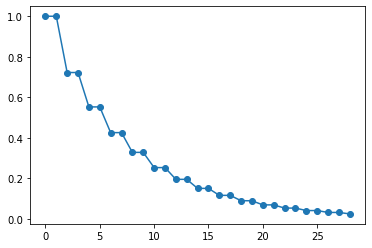

In [7]:
def ProbaNoEscape(n):
    Distribution=ProbaDistribution(n-1)
    return 1-Distribution[0,5]-Distribution[0,6] # returns 1-Proba(Exit 1)-Proba(Exit 2)

N=30

Proba=[ProbaNoEscape(n) for n in range(1,N)]

plt.plot(Proba,'o-')
plt.show()


<div markdown=1 class="Answers"> 
2) The assumption tells us that
$$
p_n:=\mathbb{P}(L_n) = c \exp(-\alpha n+ n\varepsilon_n)
$$
where  $\varepsilon_n\to 0$. Therefore
$$
\frac{\log(p_n)}{n}=\frac{\log(c)}{n}  -\frac{\alpha n}{n} + \varepsilon_n\to -\alpha.
$$
According to the script below we have $\alpha \approx 0.13...$. 


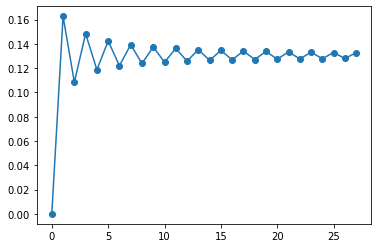

Last value =  0.13266072122278286


In [10]:
LogProba=[-np.log(Proba[k])/k for k in range(1,len(Proba))]
plt.plot(LogProba,'-o')
plt.show()
         
print('Last value = ',LogProba[-1])




<div markdown=1 class="DoIt"><br> 
Question 3). For $x\in \{A,B,C,D,E\}$ let $\pi_x^1$  be the probability that starting from $x$ the robot exits the labyrinth through Exit 1.
Use the method seen in class to write a system of equations for $\pi_A^1, ...,\pi_E^1$. Use `numpy` to solve the system and compare with your approximation obtained previously.<br>

<i>NB: If you want to solve with `numpy` the system 
$$
\begin{cases}
x+3y&=1\\
2x-y&=0
\end{cases}
$$
you can use `np.linalg.solve`:</i>
```
A=np.array([[1,3],[2,-1]])
B=np.array([1,0])
print(np.linalg.solve(A, B))
```

<div markdown=1 class="Answers"> 
According the method seen in class, we have that
$$
\begin{cases}
\pi_a&=\frac{1}{2}\pi_b+\frac{1}{2}\pi_d\\
\pi_b&=\frac{1}{3}\pi_a+\frac{1}{3}\pi_c+\frac{1}{3}\pi_e\\
\pi_c&=\frac{1}{2}\pi_b+\frac{1}{2}\\
\pi_d&=\frac{1}{2}\pi_a+\frac{1}{2}\pi_e\\
\pi_e&=\frac{1}{3}\pi_b+\frac{1}{3}\pi_d\\
\end{cases}
$$
And we can have the linear equation system that
$$
\begin{cases}
\pi_a - \frac{1}{2}\pi_b-\frac{1}{2}\pi_d&=0\\
\frac{1}{3}\pi_a-\pi_b+\frac{1}{3}\pi_c+\frac{1}{3}\pi_e&=0\\
\frac{1}{2}\pi_b-\pi_c&=-\frac{1}{2}\\
\frac{1}{2}\pi_a+-\pi_d+\frac{1}{2}\pi_e&=0\\
\frac{1}{3}\pi_b+\frac{1}{3}\pi_d-\pi_e&=0\\
\end{cases}
$$
Therefore we have the matrix $A$ and $b$ where

We solve this system with the code below and obtain indeed
$$
\pi_b\approx 0.4666...
$$

In [12]:
A=np.array([[1,-1/2,0,-1/2,0],
            [-1/3,1,-1/3,0,-1/3],
            [0,-1/2,1,0,0],
            [-1/2,0,0,1,-1/2],
            [0,-1/3,0,-1/3,1]])
B=np.array([0,0,1/2,0,0])
print(np.linalg.solve(A, B))

[0.4        0.46666667 0.73333333 0.33333333 0.26666667]


<a id="Target"></a>
## Bonus: The target (taken from BX2022's Test)

A player plays the following game: 

* A target $T \in \{1,2,3,\dots \}$ is fixed.
* The player starts from $0$ and keeps throwing a fair dice (with six faces) until the cumulative sum is $\geq T$ and then stops.
* If the player ends right on $T$ then the player has won, otherwise (<i>i.e.</i> the player ends on $T+1$, $T+2$,...,  $T+5$) the player has lost. 

Here is an example with $T=12$:
$$
0 \stackrel{\text{dice = }3}{\longrightarrow} 3 \stackrel{\text{dice = }5}{\longrightarrow} 8\stackrel{\text{dice = }1}{\longrightarrow} 9\stackrel{\text{dice = }4}{\longrightarrow} 13\ \text{(Lost)}
$$

<div markdown=1 class="DoIt"> Write a function or a script in python which computes the winning probability $p_T$ when the target is $T$. Explain your strategy and justify that it is correct.<br><br>
<i>In order to check your code:
$$
p_1=0.166667\dots,\quad p_2=0.194444\dots,\quad p_9=0.280369\dots
$$</i>

<div markdown=1 class="Answers"> Let $X_1,X_2,\dots$ be the successives dice outcomes. They are independent uniform random variables in $\{1,2,\dots, 6\}$.

The successive cumulative sums are
$$
\mathrm{Cum}=\{X_1,X_1+X_2,X_1+X_2+X_3,\dots \}
$$
and we have
$$
p_T=\mathbb{P}(T\in \mathrm{Cum}).
$$
For $i\in \mathbb{N}$ denote by $p_T(i)$ the probability that the player wins the game starting from $i$.
We want to compute
$$
p_T=p_T(0).
$$
<br>
We first observe that 
\begin{align*}
p_T(T+1)&=p_T(T+2)=p_T(T+3)=p_T(T+4)=p_T(T+5)=0\\
p_T(T)&=1
\end{align*}
For $0\leq i<T$ we write
\begin{align*}
p_T(i)&=\mathbb{P}\left(\text{win starting from }i\right)\\
&=\tfrac{1}{6}\mathbb{P}\left(\text{win starting from }i |\ \text{ first dice }= 1 \right)\\
&+\tfrac{1}{6}\mathbb{P}\left(\text{win starting from }i |\ \text{ first dice }= 2 \right)\\
&+\tfrac{1}{6}\mathbb{P}\left(\text{win starting from }i |\ \text{ first dice }= 3 \right)\\
&+\tfrac{1}{6}\mathbb{P}\left(\text{win starting from }i |\ \text{ first dice }= 4 \right)\\
&+\tfrac{1}{6}\mathbb{P}\left(\text{win starting from }i |\ \text{ first dice }= 5 \right)\\
&+\tfrac{1}{6}\mathbb{P}\left(\text{win starting from }i |\ \text{ first dice }= 6 \right)\\
&=\frac{1}{6}\left( p_T(i+1)+ p_T(i+2)+p_T(i+3)+p_T(i+4)+p_T(i+5)+p_T(i+6) \right).
\end{align*}
We deduce the code below.

In [11]:
def WinningProbability(t,p):
    # t = target
    # p = number of faces of the dice
    WinningProbabilities=np.zeros([1,t+p])# i-th coordinate = winning probability starting from i
    print(WinningProbabilities)
    WinningProbabilities[0,t]=1
    print(WinningProbabilities)
    for k in reversed(range(t)): # first computes the probability for k=n-1, then k=n-2,... 
        NextProbabilities=WinningProbabilities[0,k+1:k+p+1] # extracts the p next probabilities
        print(NextProbabilities)
        WinningProbabilities[0,k]=np.mean(NextProbabilities) # computes the mean
    return WinningProbabilities[0,0]

print('Test: should be equal to 0.2803689:')
print(WinningProbability(9,6))

Test: should be equal to 0.2803689:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[1. 0. 0. 0. 0. 0.]
[0.16666667 1.         0.         0.         0.         0.        ]
[0.19444444 0.16666667 1.         0.         0.         0.        ]
[0.22685185 0.19444444 0.16666667 1.         0.         0.        ]
[0.26466049 0.22685185 0.19444444 0.16666667 1.         0.        ]
[0.30877058 0.26466049 0.22685185 0.19444444 0.16666667 1.        ]
[0.36023234 0.30877058 0.26466049 0.22685185 0.19444444 0.16666667]
[0.2536044  0.36023234 0.30877058 0.26466049 0.22685185 0.19444444]
[0.26809402 0.2536044  0.36023234 0.30877058 0.26466049 0.22685185]
0.2803689454414977


<div markdown=1 class="DoIt"> For which target $1\leq T \leq 30$ is the game the most favourable?

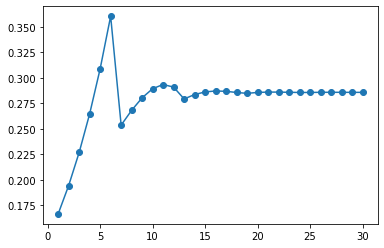

In [9]:
n=30
XX=range(1,n+1)
plt.plot(XX,[WinningProbability(n,6) for n in XX],'o-')
plt.show()



<div markdown=1 class="Answers"> According to the above plot the game is the most favourable for $T=6$.
<br><br>
<i>(In passing we observe that $(p_T)_T$ seems to converge. Indeed it can be proved using Markov chains that
$$
\lim_T p_T=\frac{1}{7/2}=0.2857...
$$
The intuition is that the average dice outcome is $7/2$ so that a large $T$ has approximately a probability $\frac{1}{7/2}$ of belonging to $\mathrm{Cum}$.)</i>
